In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import pandas as pd
pd.set_option('display.max_rows', 40)
!date

Fri Feb 28 16:03:30 PST 2020


# 2010 census demo data. AIAN pop in urban vs rural areas: looking for the downward bias in DP counts ala Akee's findings

Akee's talk here: https://vimeo.com/380264104

In [3]:
##Encoding of the AIANHH var:
#0001–4999 Federally recognized American Indian reservation and/or off-reservation trust land
#5000–5499 Hawaiian home land 5500–5999 Oklahoma tribal statistical area
#5500–5999 Oklahoma tribal statistical area
#6000–7999 Alaska Native village statistical area
#8000–8999 Tribal designated statistical area
#9000–9499 State-recognized American Indian reservation
#9500–9998 State designated tribal statistical area 

In [4]:
## Encoding of race vars
# White alone P0030002
# Black or African American alone P0030003
# American Indian and Alaska Native alone P0030004
# Asian alone P0030005
# Native Hawaiian and Other Pacific Islander alone P0030006 
# Some Other Race alone P0030007 
# Two or More Races P0030008 

In [5]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK']
record_vars = ['FILEID','STUSAB','SUMLEV','GEOVAR','GEOCOMP','CHARITER','CIFSN','LOGRECNO']
geo_codes = ['GEOID', 'GEOCODE', 'REGION', 'DIVISION']

race_cols = ['P0030001','P0030002','P0030003','P0030004','P0030005','P0030006','P0030007','P0030008'] # race vars
keep_cols = location_cols + record_vars + geo_codes + race_cols

def my_cols(x):
    if x.startswith('P001'):
        return True
    elif x.startswith(('AIAN','AITS','TTRACT','UA','UR')):
        return True
    else:
        return (x in keep_cols)

In [6]:
%%time

df_dp = pd.read_csv('/home/j/temp/abie/fiftystates2010dhc.csv', usecols=my_cols)
df_dp.backup = df_dp.copy(deep=True)

<string>:2: DtypeWarning: Columns (3,28,32,33,47,49,50) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 6min 27s, sys: 27 s, total: 6min 54s
Wall time: 7min 3s


/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [8]:
dta_columns = [x.lower() for x in df_dp.columns] #grab col names as lowercase
dta_columns[-9:] = df_dp.columns[-9:] #coded vars are capitalized
dta_columns #check contents

['fileid',
 'stusab',
 'sumlev',
 'geocomp',
 'chariter',
 'cifsn',
 'logrecno',
 'region',
 'division',
 'state',
 'county',
 'tract',
 'blkgrp',
 'block',
 'aianhh',
 'aianhhfp',
 'aianhhcc',
 'aitsce',
 'aits',
 'aitscc',
 'ttract',
 'ua',
 'uasc',
 'uatype',
 'ur',
 'aianhhns',
 'aitsns',
 'aianhhsc',
 'P0010001',
 'P0030001',
 'P0030002',
 'P0030003',
 'P0030004',
 'P0030005',
 'P0030006',
 'P0030007',
 'P0030008']

In [55]:
%%time

# r = pd.read_stata('/home/j/temp/abie/all50states_2010ur1_all_vars.dta', columns=dta_columns,
#                  chunksize=100_000, convert_missing=True, preserve_dtypes=False)

# df_sf = pd.DataFrame()
# for t in r:
#     print('.', flush=True, end=' ')
#     df_sf = df_sf.append(t[t.block != ''])
# df_sf.shape


df_sf = pd.read_csv('/home/j/temp/beatrixh/2020_census/all50states_geo_codes_all_races_02_28_2020.csv')
df_sf.backup = df_sf.copy(deep=True)

<string>:2: DtypeWarning: Columns (16,19,20) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 21.7 s, sys: 7.34 s, total: 29.1 s
Wall time: 29.5 s


/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [ ]:
# df_sf.to_csv(r'/home/j/temp/beatrixh/2020_census/all50states_geo_codes_all_races_02_28_2020.csv', index = None, header=True)

In [56]:
df_sf.columns = [x.upper() for x in df_sf.columns]
df_sf.dtypes

FILEID       object
STUSAB       object
SUMLEV        int64
GEOCOMP       int64
CHARITER      int64
CIFSN       float64
LOGRECNO      int64
REGION        int64
DIVISION      int64
STATE         int64
COUNTY        int64
TRACT         int64
BLKGRP        int64
BLOCK         int64
AIANHH        int64
AIANHHFP      int64
AIANHHCC     object
AITSCE        int64
AITS          int64
AITSCC       object
TTRACT       object
UA            int64
UASC          int64
UATYPE       object
UR           object
AIANHHNS      int64
AITSNS        int64
AIANHHSC      int64
P0010001      int64
P0030001      int64
P0030002      int64
P0030003      int64
P0030004      int64
P0030005      int64
P0030006      int64
P0030007      int64
P0030008      int64
dtype: object

In [31]:
df_sf.SUMLEV.unique()

array(['100'], dtype=object)

In [25]:
length

AttributeError: 'function' object has no attribute 'len'

In [58]:
# df_sf = df_sf.drop('UASC', axis=1)
# df_dp = df_dp.drop('UASC', axis=1) #this is just NANs

In [59]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AIANHH']

In [60]:
block_level = pd.merge(df_sf[df_sf.BLOCK.notnull()],
                       df_dp[df_dp.BLOCK.notnull()][location_cols + race_cols + ['P0010001']],
                       left_on=location_cols,
                       right_on=location_cols,
                       suffixes=('_SF', '_DP'))

In [16]:
block_level

,STATE,COUNTY,TRACT,BLKGRP,BLOCK,AIANHH,AIANHHFP,AIANHHCC,AITSCE,AITS,...,P0030008_SF,P0030001_DP,P0030002_DP,P0030003_DP,P0030004_DP,P0030005_DP,P0030006_DP,P0030007_DP,P0030008_DP,P0010001_DP
0,2,13,100,1,1363,9999,99999,99,999,99999,...,4,87,37,0,42,0,1,4,3,87
1,2,13,100,1,1366,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0
2,2,13,100,1,1369,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0
3,2,13,100,1,1370,6030,1095,E1,999,99999,...,0,0,0,0,0,0,0,0,0,0
4,2,13,100,1,1371,6030,1095,E1,999,99999,...,32,988,268,130,80,361,26,31,92,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071785,56,45,951100,1,1868,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0
11071786,56,45,951100,1,1869,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0
11071787,56,45,951100,1,1870,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0
11071788,56,45,951100,1,1871,9999,99999,99,999,99999,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# make sure no one is double counted or lost; us pop should be 308.7 mil (accoding to google)
print(f'total population sum: {block_level.P0010001_SF.sum()}')
#that's 7e5 missing. by race is it even?
print(f'total white alone sum (223.6 mil?): {block_level.P0030002_SF.sum()}')
print(f'total black alone sum (42.02 mil?): {block_level.P0030003_SF.sum()}')
print(f'total asian alone sum (17.3 mil?): {block_level.P0030005_SF.sum()}')
print(f'native hawaiian and other pacific islander: {block_level.P0030006_SF.sum()}')

total population sum: 308143815
total white alone sum (223.6 mil?): 223321794
total black alone sum (42.02 mil?): 38624194
total asian alone sum (17.3 mil?): 14653196
native hawaiian and other pacific islander: 539711


In [62]:
print(f'pct total of expected: {block_level.P0010001_SF.sum()/308.7e6}')
print(f'pct white of expected: {block_level.P0030002_SF.sum()/223.6e6}')
print(f'pct black of expected: {block_level.P0030003_SF.sum()/38_929_319}')
print(f'pct asian of expected: {block_level.P0030005_SF.sum()/14_674_252}')
print(f'pct native hawaiian and other pacific islander of expected: {block_level.P0030006_SF.sum()/540_013}')
print(f'pct AIAN of expected: {block_level.P0030004_SF.sum()/2_932_248}')
print(f'pct "some other race" of expected: {block_level.P0030007_SF.sum()/19.1e6}')

pct total of expected: 0.9981982993197279
pct white of expected: 0.9987557871198569
pct black of expected: 0.9921620771223869
pct asian of expected: 0.9985651057375872
pct native hawaiian and other pacific islander of expected: 0.9994407542040654
pct AIAN of expected: 0.9992909876654362
pct "some other race" of expected: 0.9991096335078534


In [29]:
#that seems like i'm missing some people?
#do i have AIANHH?
print(f'total population in AIANHH areas: {block_level[block_level.AIANHH!=9999].P0010001_SF.sum()}')

total population in AIANHH areas: 4849598


In [30]:
#does every row have a state?
df_dp[df_dp.STATE.isnull()].shape

(0, 27)

In [32]:
for col in df_sf.columns:
    print(col)

STATE
COUNTY
TRACT
BLKGRP
BLOCK
AIANHH
AIANHHFP
AIANHHCC
AITSCE
AITS
AITSCC
TTRACT
UA
UASC
UATYPE
UR
AIANHHNS
AITSNS
AIANHHSC
P0010001
P0030001
P0030002
P0030003
P0030004
P0030005
P0030006
P0030007
P0030008


In [26]:
#ok can we get state totals?
states = df_dp[(df_dp.COUNTY.isnull()) & (df_dp.TRACT.isnull()) & (df_dp.BLKGRP.isnull()) & (df_dp.BLOCK.isnull())]
states.

,STATE,COUNTY,TRACT,BLKGRP,BLOCK,AIANHH,AIANHHFP,AIANHHCC,AITSCE,AITS,...,AIANHHSC,P0010001,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,250333,250333,158024,15365,21553,22677,5735,6423,20556
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28605,28605,23968,604,1265,676,99,287,1706
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3715,3715,625,10,2369,327,73,40,271
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4397,4397,968,33,2911,97,15,23,350
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2786,2786,2308,210,37,88,3,11,129


In [38]:
# things to check:
# by county, by state, by tract, by blkgpr, by block: check urban v rural aian
# by reservation, urban v rural aian
# off reservation, urban v rural aian

In [39]:
# first: by county, urban v rural aian
rural_block_level = block_level[block_level.UR=='R']
urban_block_level = block_level[block_level.UR=='U']

In [60]:
race_vars = [str(i) + '_SF' for i in race_cols + ['P0010001']] + [str(i) + '_DP' for i in race_cols + ['P0010001']]

In [59]:
rural_county_level = rural_block_level.groupby(['STATE','COUNTY'])[race_vars].apply(lambda x : x.astype(int).sum())
urban_county_level = urban_block_level.groupby(['STATE','COUNTY'])[race_vars].apply(lambda x : x.astype(int).sum())

# County level: change in AIAN urban pop (SF vs DP)

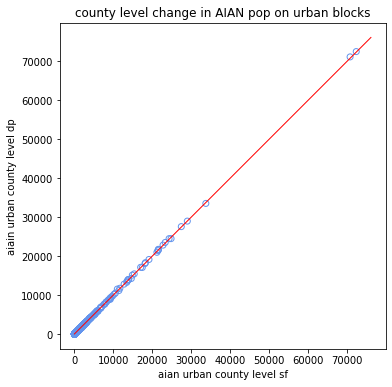

In [62]:
# 
x = urban_county_level[["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks')

plt.show()

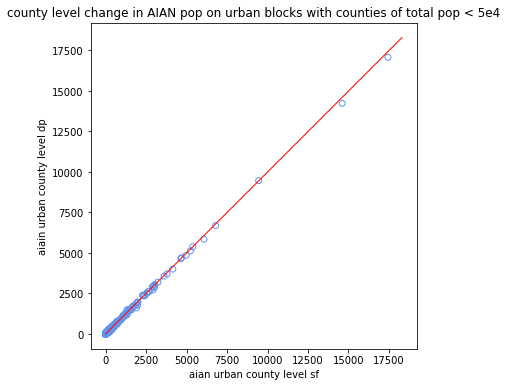

In [65]:
# 
x = urban_county_level[(urban_county_level.P0010001_SF < 5e4)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0010001_SF < 5e4)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of total pop < 5e4')

plt.show()

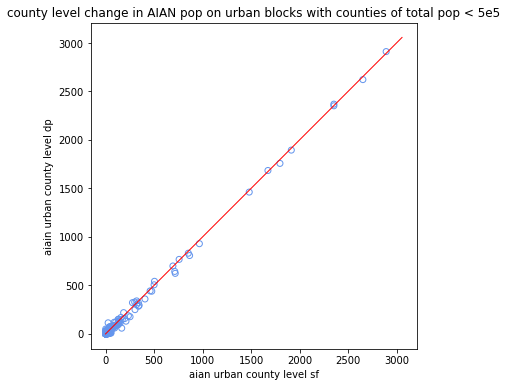

In [66]:
# 
x = urban_county_level[(urban_county_level.P0010001_SF < 5e3)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0010001_SF < 5e3)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of total pop < 5e5')

plt.show()

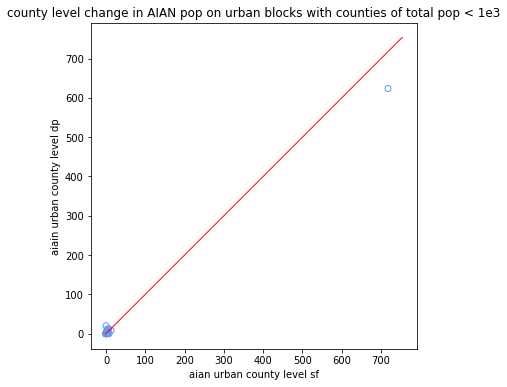

In [69]:
# 
x = urban_county_level[(urban_county_level.P0010001_SF < 1e3)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0010001_SF < 1e3)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of total pop < 1e3')

plt.show()

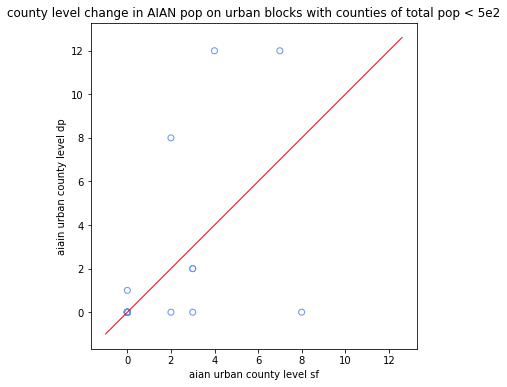

In [70]:
# 
x = urban_county_level[(urban_county_level.P0010001_SF < 5e2)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0010001_SF < 5e2)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of total pop < 5e2')

plt.show()

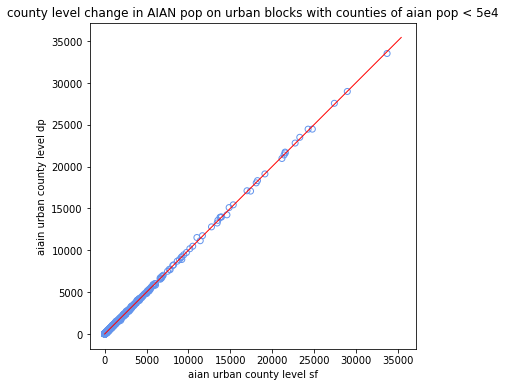

In [82]:
# 
x = urban_county_level[(urban_county_level.P0030004_SF < 5e4)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0030004_SF < 5e4)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of aian pop < 5e4')

plt.show()

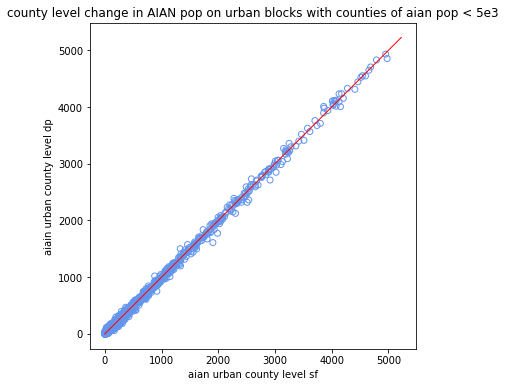

In [83]:
# 
x = urban_county_level[(urban_county_level.P0030004_SF < 5e3)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0030004_SF < 5e3)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of aian pop < 5e3')

plt.show()

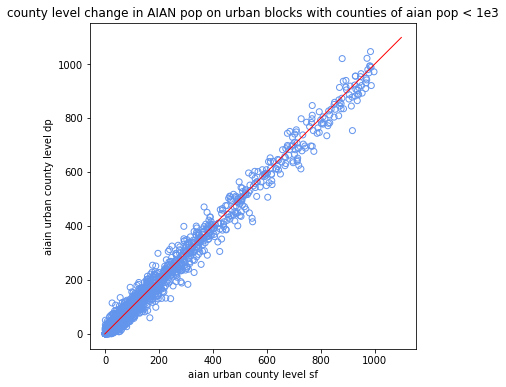

In [84]:
# 
x = urban_county_level[(urban_county_level.P0030004_SF < 1e3)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0030004_SF < 1e3)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of aian pop < 1e3')

plt.show()

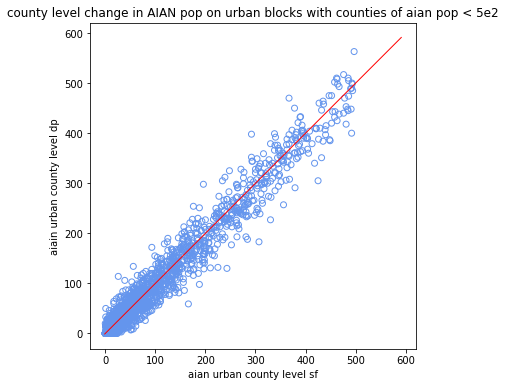

In [85]:
# 
x = urban_county_level[(urban_county_level.P0030004_SF < 5e2)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0030004_SF < 5e2)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of aian pop < 5e2')

plt.show()

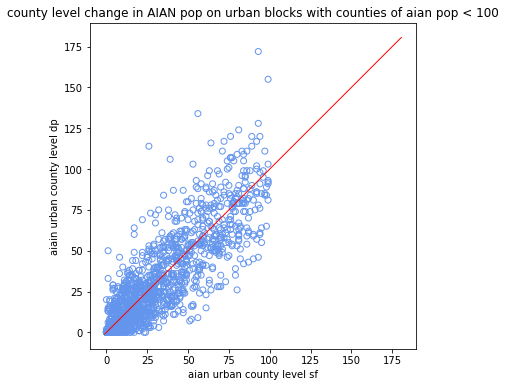

In [86]:
# 
x = urban_county_level[(urban_county_level.P0030004_SF < 1e2)][["P0030004_SF"]] #aian urban county level sf
y = urban_county_level[(urban_county_level.P0030004_SF < 1e2)][["P0030004_DP"]] #aiain urban county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian urban county level sf')
plt.ylabel('aiain urban county level dp')
plt.title('county level change in AIAN pop on urban blocks with counties of aian pop < 100')

plt.show()

# County level: change in AIAN rural pop (SF vs DP)

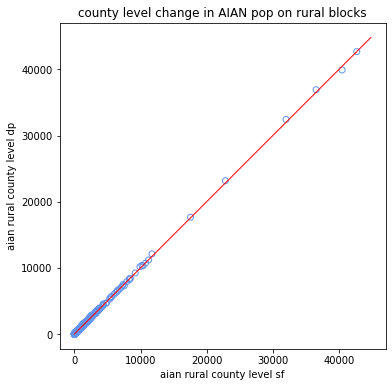

In [81]:
# 
x = rural_county_level[["P0030004_SF"]] #aian rural county level sf
y = rural_county_level[["P0030004_DP"]] #aiain rural county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian rural county level sf')
plt.ylabel('aian rural county level dp')
plt.title('county level change in AIAN pop on rural blocks')

plt.show()

In [ ]:
# 
x = rural_county_level[(rural_county_level.P0010001_SF < 5e4) | (rural_county_level.P0010001_DP < 5e4)][["P0030004_SF"]] #aian rural county level sf
y = rural_county_level[(rural_county_level.P0010001_SF < 5e4) | (rural_county_level.P0010001_DP < 1e2)][["P0030004_DP"]] #aiain rural county level dp

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('aian rural county level sf')
plt.ylabel('aiain rural county level dp')
plt.title('county level change in AIAN pop on rural blocks with counties of aian pop < 100')

plt.show()

In [109]:
block_level_aian = block_level[block_level.AIANHH!=9999]

In [110]:
block_level_aian_res_agg = block_level_aian.groupby(['AIANHH'])['P0060004_SF','P0060004_DP',
                                                        'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


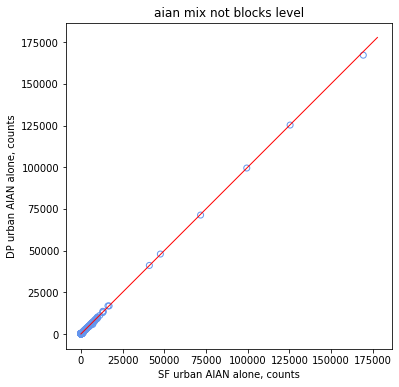

In [187]:
# overall aian on res
x = block_level_aian_res_agg[["P0060004_SF"]]
y = block_level_aian_res_agg[["P0060004_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('aian mix not blocks level')

plt.show()

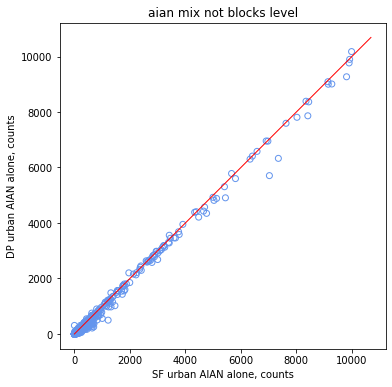

In [114]:
# zoom in
x = block_level_aian_res_agg[(block_level_aian_res_agg.P0060004_SF<1e4)|(block_level_aian_res_agg.P0060004_DP<1e4)][["P0060004_SF"]]
y = block_level_aian_res_agg[(block_level_aian_res_agg.P0060004_SF<1e4)|(block_level_aian_res_agg.P0060004_DP<1e4)][["P0060004_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('aian mix not blocks level')

plt.show()

In [126]:
urban = block_level[block_level.UR=='U']
rural = block_level[block_level.UR=='R']

In [127]:
urban_county = urban.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                                 'P0060004_SF','P0060004_DP',
                                                 'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
rural_county = rural.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                                 'P0060004_SF','P0060004_DP',
                                                 'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


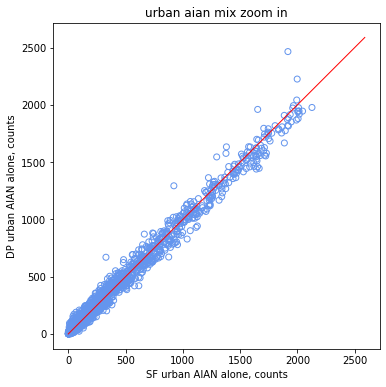

In [181]:
# urban aian mix zoom in
x = urban_county[(urban_county.P0060004_SF<2e3)|(urban_county.P0060004_DP<2e3)]['P0060004_SF']
y = urban_county[(urban_county.P0060004_SF<2e3)|(urban_county.P0060004_DP<2e3)]['P0060004_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('urban aian mix zoom in')

plt.show()

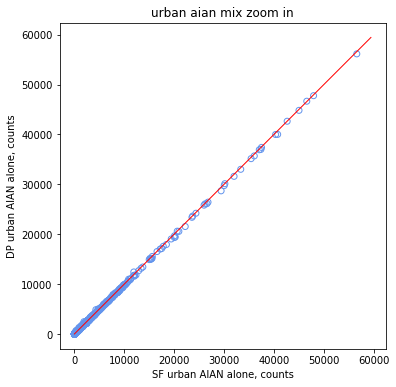

In [122]:
# urban aian mix zoom in
x = urban_county[(urban_county.P0060004_SF<6e4)|(urban_county.P0060004_DP<6e4)]['P0060004_SF']
y = urban_county[(urban_county.P0060004_SF<6e4)|(urban_county.P0060004_DP<6e4)]['P0060004_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('urban aian mix zoom in')

plt.show()

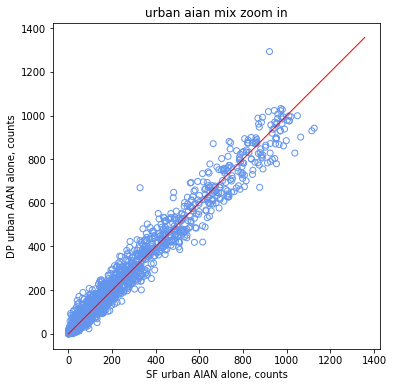

In [123]:
# urban aian mix zoom in
x = urban_county[(urban_county.P0060004_SF<1e3)|(urban_county.P0060004_DP<1e3)]['P0060004_SF']
y = urban_county[(urban_county.P0060004_SF<1e3)|(urban_county.P0060004_DP<1e3)]['P0060004_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('urban aian mix zoom in')

plt.show()

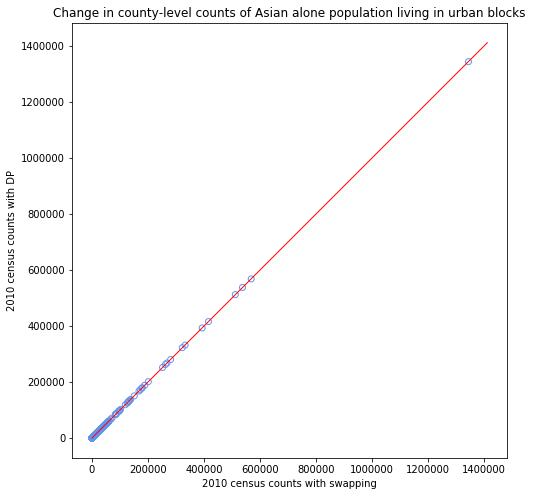

In [160]:
# asian urban
x = urban_county['P0030005_SF']
y = urban_county['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in county-level counts of Asian alone population living in urban blocks')

plt.show()

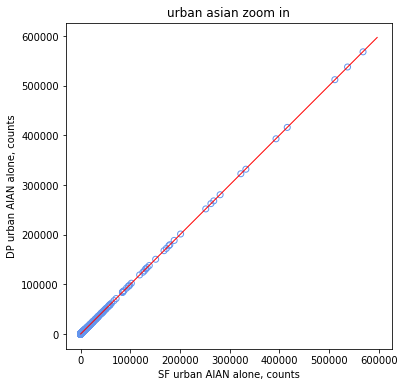

In [144]:
# asian urban
x = urban_county[(urban_county.P0030005_SF<6e5)|(urban_county.P0030005_DP<6e5)]['P0030005_SF']
y = urban_county[(urban_county.P0030005_SF<6e5)|(urban_county.P0030005_DP<6e5)]['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('urban asian zoom in')

plt.show()

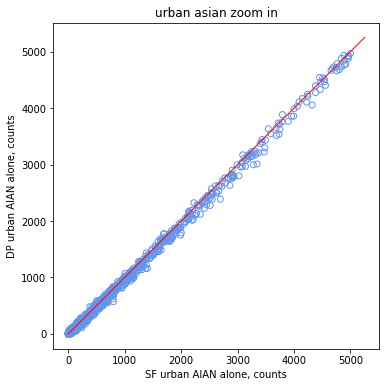

In [145]:
# asian urban
x = urban_county[(urban_county.P0030005_SF<5e3)|(urban_county.P0030005_DP<5e3)]['P0030005_SF']
y = urban_county[(urban_county.P0030005_SF<5e3)|(urban_county.P0030005_DP<5e3)]['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('urban asian zoom in')

plt.show()

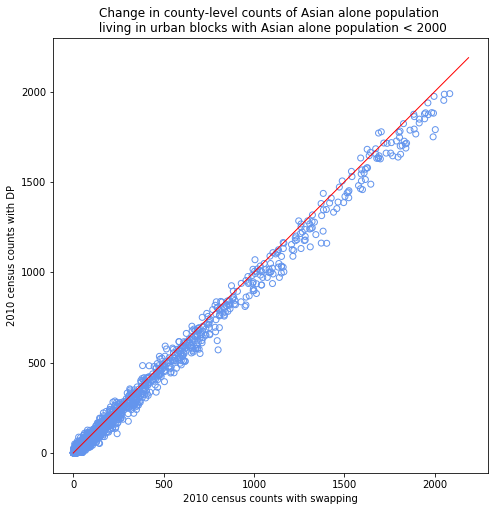

In [165]:
# asian urban
x = urban_county[(urban_county.P0030005_SF<2e3)|(urban_county.P0030005_DP<2e3)]['P0030005_SF']
y = urban_county[(urban_county.P0030005_SF<2e3)|(urban_county.P0030005_DP<2e3)]['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in county-level counts of Asian alone population \n living in urban blocks with Asian alone population < 2000')

plt.show()

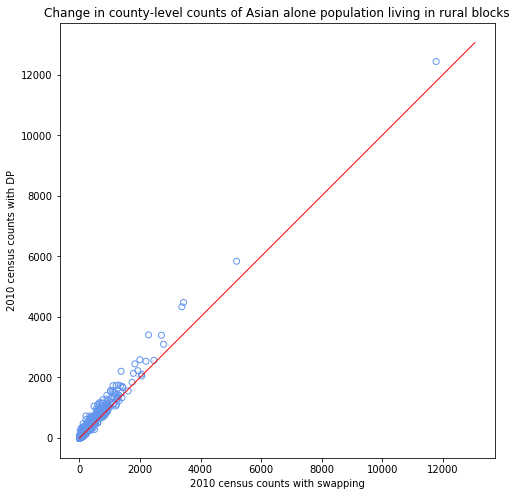

In [166]:
# asian rural
x = rural_county['P0030005_SF']
y = rural_county['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in county-level counts of Asian alone population living in rural blocks')

plt.show()

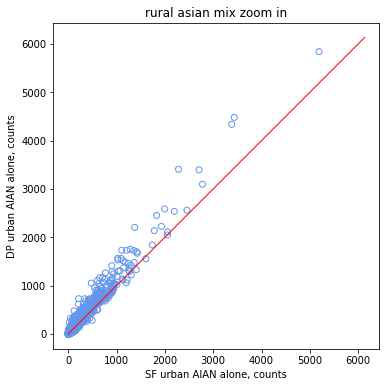

In [138]:
# asian rural
x = rural_county[(rural_county.P0030005_SF<6e3)|(rural_county.P0030005_DP<6e3)]['P0030005_SF']
y = rural_county[(rural_county.P0030005_SF<6e3)|(rural_county.P0030005_DP<6e3)]['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in county-level counts of Asian alone population living in rural blocks')

plt.show()

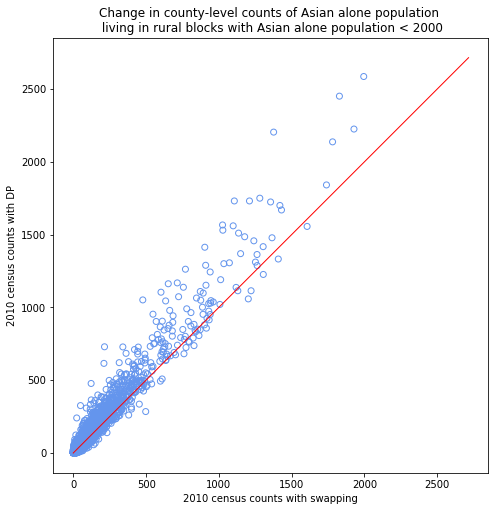

In [168]:
# asian rural
x = rural_county[(rural_county.P0030005_SF<2e3)|(rural_county.P0030005_DP<2e3)]['P0030005_SF']
y = rural_county[(rural_county.P0030005_SF<2e3)|(rural_county.P0030005_DP<2e3)]['P0030005_DP']

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in county-level counts of Asian alone population \n living in rural blocks with Asian alone population < 2000')

plt.show()

In [99]:
df_sf[df_sf.BLOCK.notnull()].P0010001.sum()

308143815

In [91]:
df_sf[df_sf.AITS.notnull()].P0030005.sum()

14676976

In [92]:
df_sf[df_sf.AIANHH.notnull()].P0030005.sum()

15635492

In [94]:
df_sf[df_sf.AITS.notnull()].P0030005.sum()

14676976

In [96]:
df_sf[df_sf.TTRACT.notnull()].P0030005.sum()

14653196

In [ ]:
df_sf[df_sf.AITS.notnull()].P0030005.sum()

In [89]:
df_sf[(df_sf.BLOCK.notnull()) & (df_sf.UR.notnull())].P0030005.sum()

14653196

In [23]:
df_sf[(df_sf.AIANHH.notnull()) & (df_sf.AIANHH!=9999)].BLOCK.unique()

array([1370., 1371., 1446., ...,   69.,   70.,   71.])

In [24]:
df_dp[(df_dp.AIANHH.notnull()) & (df_dp.AIANHH!=9999)].shape

(455415, 22)

In [25]:
df_aian = pd.merge(df_sf[(df_sf.AIANHH.notnull()) & (df_sf.AIANHH!=9999)], df_dp[(df_dp.AIANHH.notnull()) & (df_dp.AIANHH!=9999)], left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))

In [28]:
df_aian.columns

Index(['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AIANHH', 'AIANHHFP_SF',
       'AIANHHCC_SF', 'AITSCE_SF', 'AITS_SF', 'AITSCC_SF', 'TTRACT_SF',
       'UA_SF', 'UASC_SF', 'UATYPE_SF', 'UR_SF', 'AIANHHNS_SF', 'AITSNS_SF',
       'AIANHHSC_SF', 'P0010001_SF', 'P0030005_SF', 'P0060004_SF',
       'AIANHHFP_DP', 'AIANHHCC_DP', 'AITSCE_DP', 'AITS_DP', 'AITSCC_DP',
       'TTRACT_DP', 'UA_DP', 'UASC_DP', 'UATYPE_DP', 'UR_DP', 'AIANHHNS_DP',
       'AITSNS_DP', 'AIANHHSC_DP', 'P0010001_DP', 'P0030005_DP',
       'P0060004_DP'],
      dtype='object')

In [30]:
df_aian_by_res = df_aian.groupby(['AIANHH'])['P0030005_SF','P0030005_DP',
                                                        'P0060004_SF','P0060004_DP',
                                                        'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df_aian_by_res[df_aian_by_res.P0030005_SF > 2e7]

,P0030005_SF,P0030005_DP,P0060004_SF,P0060004_DP,P0010001_SF,P0010001_DP
AIANHH,,,,,,
5550.0,31724736,32081208,1001333892,999948642,4006920159,4006413918


In [48]:
df_aian[df_aian.TTRACT_SF!=999999.0]

,STATE,COUNTY,TRACT,BLKGRP,BLOCK,AIANHH,AIANHHFP_SF,AIANHHCC_SF,AITSCE_SF,AITS_SF,...,UA_DP,UASC_DP,UATYPE_DP,UR_DP,AIANHHNS_DP,AITSNS_DP,AIANHHSC_DP,P0010001_DP,P0030005_DP,P0060004_DP
79,2,13.0,100.0,NaN,NaN,6030.0,1095.0,E1,NaN,NaN,...,NaN,NaN,NaN,NaN,2418758.0,NaN,NaN,1008,371,129
80,2,13.0,100.0,NaN,NaN,6195.0,5980.0,E1,NaN,NaN,...,NaN,NaN,NaN,NaN,2418788.0,NaN,NaN,0,0,0
81,2,13.0,100.0,NaN,NaN,6500.0,24675.0,E1,NaN,NaN,...,NaN,NaN,NaN,NaN,2418579.0,NaN,NaN,24,20,0
82,2,13.0,100.0,NaN,NaN,6735.0,39415.0,E1,NaN,NaN,...,NaN,NaN,NaN,NaN,2418652.0,NaN,NaN,913,310,380
83,2,13.0,100.0,NaN,NaN,7025.0,52945.0,E1,NaN,NaN,...,NaN,NaN,NaN,NaN,2418732.0,NaN,NaN,79,18,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742298,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,1597068.0,NaN,NaN,0,0,0
1742299,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,1597068.0,NaN,NaN,0,0,0
1742300,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,1597068.0,NaN,NaN,214,0,12
1742301,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,1597068.0,NaN,NaN,214,0,12


In [70]:
df_dp[(df_dp.AIANHHCC.notnull()) & (df_dp.AIANHHCC!=99)].AIANHHCC.unique()

array(['99', 'E1', 'D2', 'D9', 'D1', 'D4', 'D8', 'D5', 'D3', 'D6', 'F1',
       'D0'], dtype=object)

In [71]:
df_sf[(df_sf.AIANHHCC.notnull()) & (df_sf.AIANHHCC!=99)].AIANHHCC.unique()

array(['99', 'E1', 'D2', 'D9', 'D1', 'D4', 'D8', 'D5', 'D3', 'D6', 'F1',
       'D0'], dtype=object)

In [68]:
dp_fips = df_dp[(df_dp.AIANHHCC.notnull()) & (df_dp.AIANHHCC!=99)]

In [49]:
sf_fips = df_sf[(df_sf.AIANHHCC.notnull()) & (df_sf.AIANHHCC!=99)]

In [72]:
fips = pd.merge(df_sf[(df_sf.AIANHHCC.notnull()) & (df_sf.AIANHHCC!='99')], df_dp[(df_dp.AIANHHCC.notnull()) & (df_dp.AIANHHCC!='99')][location_cols + ['P0060004','P0030005','P0010001']], left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))

In [76]:
fips[fips.BLOCK.notnull()].P0030005_SF.sum()

6678761

In [78]:
not_block_fips = fips[fips.BLOCK.notnull()]

In [79]:
# overall aian on res
x = not_block_fips[["P0030005_SF"]]
y = not_block_fips[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('fips not blocks level')

plt.show()

KeyboardInterrupt: 

In [65]:
fips.P0030005_SF.sum()

68008958

In [66]:
fips.AIANHHCC.unique()

array(['99', 'E1', 'D2', 'D9', 'D1', 'D4', 'D8', 'D5', 'D3', 'D6', 'F1',
       'D0'], dtype=object)

In [55]:
fips

,STATE,COUNTY,TRACT,BLKGRP,BLOCK,AIANHH,AIANHHFP,AIANHHCC,AITSCE,AITS,...,UR,AIANHHNS,AITSNS,AIANHHSC,P0010001_SF,P0030005_SF,P0060004_SF,P0060004_DP,P0030005_DP,P0010001_DP
0,2,13.0,100.0,1.0,1363.0,9999.0,99999.0,99,999.0,99999.0,...,R,99999999.0,99999999.0,0.0,24,5,0,42,0,87
1,2,13.0,100.0,1.0,1366.0,9999.0,99999.0,99,999.0,99999.0,...,R,99999999.0,99999999.0,0.0,0,0,0,0,0,0
2,2,13.0,100.0,1.0,1369.0,9999.0,99999.0,99,999.0,99999.0,...,R,99999999.0,99999999.0,0.0,0,0,0,0,0,0
3,2,13.0,100.0,1.0,1370.0,6030.0,1095.0,E1,999.0,99999.0,...,R,2418758.0,99999999.0,9.0,0,0,0,0,0,0
4,2,13.0,100.0,1.0,1371.0,6030.0,1095.0,E1,999.0,99999.0,...,R,2418758.0,99999999.0,9.0,942,438,27,129,361,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126334,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,1597068.0,NaN,16.0,9,0,6,0,0,0
2126335,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,1597068.0,NaN,16.0,9,0,6,0,0,0
2126336,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,1597068.0,NaN,16.0,9,0,6,12,0,214
2126337,56,17.0,NaN,NaN,NaN,4610.0,84200.0,D5,NaN,NaN,...,NaN,1597068.0,NaN,16.0,9,0,6,12,0,214


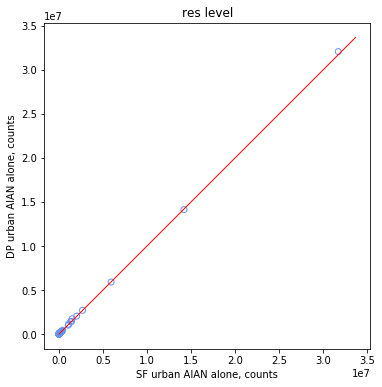

In [31]:
# overall aian on res
x = df_aian_by_res[["P0030005_SF"]]
y = df_aian_by_res[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('res level')

plt.show()

In [ ]:
# overall aian on res
x = df_aian_by_res[(df_aian_by_res.P0030005_SF < )][["P0030005_SF"]]
y = df_aian_by_res[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('res level')

plt.show()

In [ ]:
#store columns by type
float_cols = list(df_dp.loc[:, df_dp.dtypes == np.float64].columns)
int_cols = df_dp.loc[:, df_dp.dtypes == np.int64].columns

print(float_cols)
print(int_cols)

In [52]:
df_sf.loc[:,int_cols] = df_sf.loc[:,int_cols].astype(np.int64)

In [73]:
df_sf = df_sf.replace('', np.nan, regex=True)

In [115]:
sf_reduced = df_sf[['P0010001','P0030005','AIANHH','UR','STATE','COUNTY','TRACT','BLKGRP','BLOCK','AITS']]

In [116]:
dp_reduced = df_dp[['P0010001','P0030005','AIANHH','UR','STATE','COUNTY','TRACT','BLKGRP','BLOCK','AITS']]

In [117]:
dp_reduced.dtypes

P0010001      int64
P0030005      int64
AIANHH      float64
UR           object
STATE         int64
COUNTY      float64
TRACT       float64
BLKGRP      float64
BLOCK       float64
AITS        float64
dtype: object

In [118]:
sf_reduced.AIANHH = sf_reduced.AIANHH.astype(np.float64)
sf_reduced.COUNTY = sf_reduced.COUNTY.astype(np.float64)
sf_reduced.TRACT = sf_reduced.TRACT.astype(np.float64)
sf_reduced.BLKGRP = sf_reduced.BLKGRP.astype(np.float64)
sf_reduced.BLOCK = sf_reduced.BLOCK.astype(np.float64)
sf_reduced.AITS = sf_reduced.AITS.astype(np.float64)

In [121]:
sf_reduced.head

<bound method NDFrame.head of           P0010001  P0030005  AIANHH   UR  STATE  COUNTY  TRACT  BLKGRP  \
0           710231     38135     NaN  NaN      2     NaN    NaN     NaN   
1           468893     32358     NaN  NaN      2     NaN    NaN     NaN   
2           315756     24665     NaN  NaN      2     NaN    NaN     NaN   
3           153137      7693     NaN  NaN      2     NaN    NaN     NaN   
4           241338      5777     NaN  NaN      2     NaN    NaN     NaN   
...            ...       ...     ...  ...    ...     ...    ...     ...   
13717939       732         1     NaN  NaN     56     NaN    NaN     NaN   
13717940     21294       235     NaN  NaN     56     NaN    NaN     NaN   
13717941      1521         7     NaN  NaN     56     NaN    NaN     NaN   
13717942      7801        47     NaN  NaN     56     NaN    NaN     NaN   
13717943       288         3     NaN  NaN     56     NaN    NaN     NaN   

          BLOCK  AITS  
0           NaN   NaN  
1           NaN   NaN

In [122]:
dp_reduced.head

<bound method NDFrame.head of           P0010001  P0030005  AIANHH   UR  STATE  COUNTY  TRACT  BLKGRP  \
0           250333     22677     NaN    U      2     NaN    NaN     NaN   
1            28605       676     NaN    U      2     NaN    NaN     NaN   
2             3715       327     NaN    U      2     NaN    NaN     NaN   
3             4397        97     NaN    U      2     NaN    NaN     NaN   
4             2786        88     NaN    U      2     NaN    NaN     NaN   
...            ...       ...     ...  ...    ...     ...    ...     ...   
13717789       828         0     NaN  NaN     56     NaN    NaN     NaN   
13717790     21240       208     NaN  NaN     56     NaN    NaN     NaN   
13717791      1512         3     NaN  NaN     56     NaN    NaN     NaN   
13717792      7774        37     NaN  NaN     56     NaN    NaN     NaN   
13717793       184         0     NaN  NaN     56     NaN    NaN     NaN   

          BLOCK  AITS  
0           NaN   NaN  
1           NaN   NaN

In [119]:
df_reduced = pd.merge(sf_reduced, dp_reduced, left_on=dp_reduced.columns, right_on=dp_reduced.columns, suffixes=('_SF', '_DP'))

KeyError: Index(['P0010001', 'P0030005', 'AIANHH', 'UR', 'STATE', 'COUNTY', 'TRACT',
       'BLKGRP', 'BLOCK', 'AITS'],
      dtype='object')

In [ ]:
df_sf.loc[:,float_cols]

In [74]:
df_sf.loc[:,float_cols] = df_sf.loc[:,float_cols].astype(np.float64)

#check
df_sf.dtypes

ValueError: could not convert string to float: '##'

In [ ]:
left = df_sf[location_cols + race_cols + ['P0010001']]
df = pd.merge(left, df_dp, left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))
df

In [ ]:
left = df_sf[location_cols + race_cols + ['P0010001']]
df = pd.merge(left[(left.BLOCK != '')], df_dp.dropna(subset=['BLOCK']), left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))
df

## want to check out two sets of quandrants:
# {urban aian, rural aian} x {> 99 q, < 99q} & {on-res aian, off-res aian} x {> 99 q, < 99q}

In [ ]:
# county level 
county_df = df.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                           'P0060004_SF','P0060004_DP',
                                           'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

In [13]:
#subset to urban areas, grouped by county
urban_county = df[df.UR== 'U'].copy(deep=True)
urban_county = #subset to rural areas, grouped by county
rural_county = df[df.UR== 'R'].copy(deep=True)
rural_county = rural_county.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                                        'P0060004_SF','P0060004_DP',
                                                        'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [14]:
#subset to rural areas, grouped by county
rural_county = df[df.UR== 'R'].copy(deep=True)
rural_county = rural_county.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                                        'P0060004_SF','P0060004_DP',
                                                        'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [17]:
#get 99th quantile
q99 = np.quantile(county_df['P0030005_SF'],.99)
q99

88698.95000000023

In [27]:
rural_above = rural_county[rural_county['P0030005_SF'] > 2]['P0030005_SF']
rural_above.shape

(3002,)

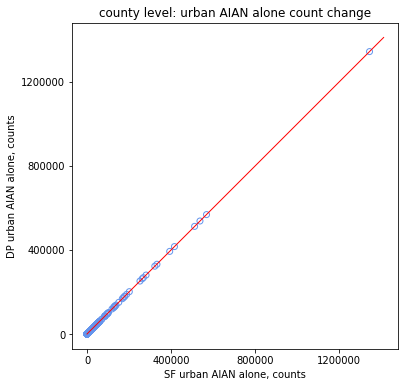

In [26]:
x = urban_county[["P0030005_SF"]]
y = urban_county[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

plt.xticks(np.arange(0, 1.4e6, step = 4e5))
plt.yticks(np.arange(0, 1.4e6, step = 4e5))

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN alone count change')

plt.show()

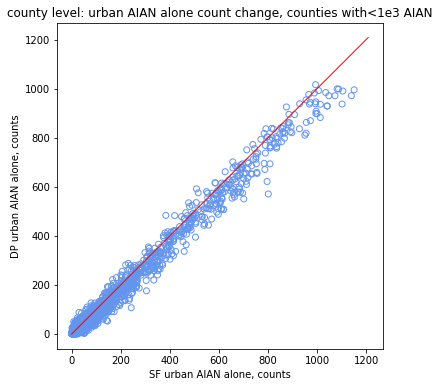

In [27]:
#let's zoom in
x = urban_county[(urban_county.P0030005_DP<1e3) | (urban_county.P0030005_SF<1e3)][["P0030005_SF"]]
y = urban_county[(urban_county.P0030005_DP<1e3) | (urban_county.P0030005_SF<1e3)][["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN alone count change, counties with<1e3 AIAN')

plt.show()

## vs rural

In [28]:
#subset to rural areas, grouped by county
rural_county = df[df.UR== 'R'].copy(deep=True)
rural_county = rural_county.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP',
                                                        'P0060004_SF','P0060004_DP',
                                                        'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [29]:
#plot urban areas by tract, dp vs sf
x = rural_county[["P0030005_SF"]]
y = rural_county[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF rural AIAN alone, counts')
plt.ylabel('DP rural AIAN alone, counts')
plt.title('county level: rural AIAN alone count change')

plt.show()

KeyboardInterrupt: 

In [ ]:
#zooming in
x = rural_county[(rural_county.P0030005_DP<3e3) | (rural_county.P0030005_SF<3e3)][["P0030005_SF"]]
y = rural_county[(rural_county.P0030005_DP<3e3) | (rural_county.P0030005_SF<3e3)][["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF rural AIAN alone, counts')
plt.ylabel('DP rural AIAN alone, counts')
plt.title('county level: rural AIAN alone count change, counties with<3e3 AIAN')

plt.show()

## now back to urban:

In [ ]:
#check out count difference
urban_county['abs_diff'] = urban_county['P0030005_DP'] - urban_county['P0030005_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_county[(urban_county.P0030005_DP!=0) | (urban_county.P0030005_SF!=0)].abs_diff, bins = 100)

plt.title('County level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 

In [ ]:
#zoom in (counts in log space)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_county[(urban_county.P0030005_DP!=0) | (urban_county.P0030005_SF!=0)].abs_diff, bins = 100)
plt.yscale('log')

plt.title('County level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 

In [ ]:
#subset to urban areas, grouped by county
urban_tract = df[df.UR== 'U'].copy(deep=True)
urban_tract = urban_tract.groupby(['STATE','COUNTY','TRACT'])['P0030005_SF','P0030005_DP',
                                                              'P0060004_SF','P0060004_DP',
                                                              'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

In [ ]:
#plot urban areas by tract, dp vs sf
x = urban_tract[["P0030005_SF"]]
y = urban_tract[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('tract level: urban AIAN alone count change')

plt.show()

In [ ]:
#check out count difference
urban_tract['abs_diff'] = urban_tract['P0030005_DP'] - urban_tract['P0030005_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_tract[(urban_tract.P0030005_DP!=0) | (urban_tract.P0030005_SF!=0)].abs_diff, bins = 100)

plt.title('Tract level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 

In [ ]:
urban_county.abs_diff.describe()

In [ ]:
#zooming in (this is same as above scatter)
urban_county[(urban_county.P0030005_DP<5e2) | (urban_county.P0030005_SF<5e2)].abs_diff.describe()

In [ ]:
#zoom in (counts in log space)
urban_tract['abs_diff'] = urban_tract['P0030005_DP'] - urban_tract['P0030005_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_tract[(urban_tract.P0030005_DP!=0) | (urban_tract.P0030005_SF!=0)].abs_diff, bins = 100)
plt.yscale('log')

plt.title('Tract level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 

## checkout AIAN in combo (solely AIAN + AIAN mixed individuals)

In [ ]:
#check out AIAN in combo, county level counts change
x = urban_county[["P0060004_SF"]]
y = urban_county[["P0060004_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN in combo count change')

plt.show()

In [ ]:
#zooming in

#check out AIAN in combo, county level counts change
x = urban_county[(urban_county.P0060004_DP<6e4) | (urban_county.P0060004_SF<6e4)][["P0060004_SF"]]
y = urban_county[(urban_county.P0060004_DP<6e4) | (urban_county.P0060004_SF<6e4)][["P0060004_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN in combo count change, for mixed counts <6e4')

plt.show()

In [ ]:
#zooming in

#check out AIAN in combo, county level counts change
x = urban_county[(urban_county.P0060004_DP<5e3) | (urban_county.P0060004_SF<5e3)][["P0060004_SF"]]
y = urban_county[(urban_county.P0060004_DP<5e3) | (urban_county.P0060004_SF<5e3)][["P0060004_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN in combo count change, for mixed counts<2e4')

plt.show()

## View DP-SF difference as a function of AIAN count

In [ ]:
urban_county["abs_diff_aian_combo"] = urban_county["P0060004_DP"] - urban_county["P0060004_SF"]

#check out AIAN in combo, county level counts change
x = urban_county[["P0060004_SF"]]
y = urban_county[["abs_diff_aian_combo"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

xleft, xright = ax.get_xlim()
ax.plot([0,xright],[0,0], 'red', linewidth=1)

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('change in DP count from SF')
plt.title('county level: urban AIAN in combo count change')

plt.show()

In [ ]:
#zooming in 

#check out AIAN alone, county level counts change
x = urban_county[["P0030005_SF"]]
y = urban_county[["abs_diff"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

xleft, xright = ax.get_xlim()
ax.plot([0,xright],[0,0], 'red', linewidth=1)


plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('change in DP count from SF')
plt.title('county level: urban AIAN alone count change')

plt.show()

In [ ]:
#zooming in 

#check out AIAN alone, county level counts change
x = urban_county[(urban_county.P0030005_SF<2e5)][["P0030005_SF"]]
y = urban_county[(urban_county.P0030005_SF<2e5)][["abs_diff"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

xleft, xright = ax.get_xlim()
ax.plot([0,xright],[0,0], 'red', linewidth=1)


plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('change in DP count from SF')
plt.title('county level: urban AIAN alone count change for counties with <2e5 AIAN alone')

plt.show()

In [ ]:
#todo: you need to checkout the distribution of urban aian, and also on-res aian
#to see if it looks like what you were seeing with toy data.

In [ ]:
urban_county.size

# checkout aian urban overall distribution

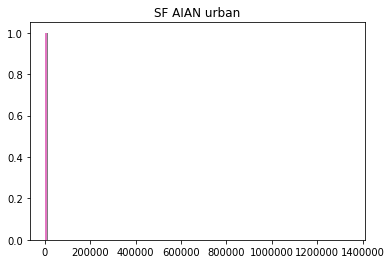

In [30]:
#check out AIAN alone, county level counts change
x = urban_county[["P0030005_SF"]]

plt.hist(x, bins = 100)
plt.title('SF AIAN urban')

plt.show()

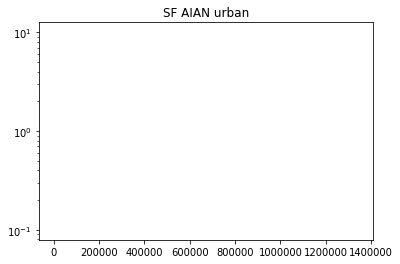

In [33]:
#check out AIAN alone, county level counts change
x = urban_county[["P0030005_SF"]]

plt.hist(x, bins = 500, log = True)
plt.title('SF AIAN urban')

plt.show()